In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [30]:
data_dir_2d = r"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\Cube\2d\temp.csv"
data_dir_3d = r"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\Cube\3d\Mid\temp.csv"

In [31]:
df_2d = pd.read_csv(data_dir_2d, header = None, skiprows = 1)
df_3d = pd.read_csv(data_dir_3d, header = None, skiprows = 1)

# Rename columns (assuming 3 columns: X, Y, Temperature)
df_2d.columns = ['X', 'Y', 'Temperature']
df_3d.columns = ['X', 'Y', 'Temperature']

In [32]:
df_2d.shape, df_3d.shape

((961, 3), (441, 3))

In [33]:
df_2d.head()

,X,Y,Temperature
0,0.000000e+00,0.000,342.135
1,-6.940000e-19,0.005,342.084
2,-1.390000e-18,0.010,342.026
3,-2.080000e-18,0.015,341.969
4,-2.780000e-18,0.020,341.915


In [34]:
df_3d.head()

,X,Y,Temperature
0,0.095,5.000000e-03,333.852
1,0.095,0.000000e+00,335.066
2,0.100,-5.490000e-34,334.521
3,0.100,5.000000e-03,333.538
4,0.100,1.000000e-02,332.402


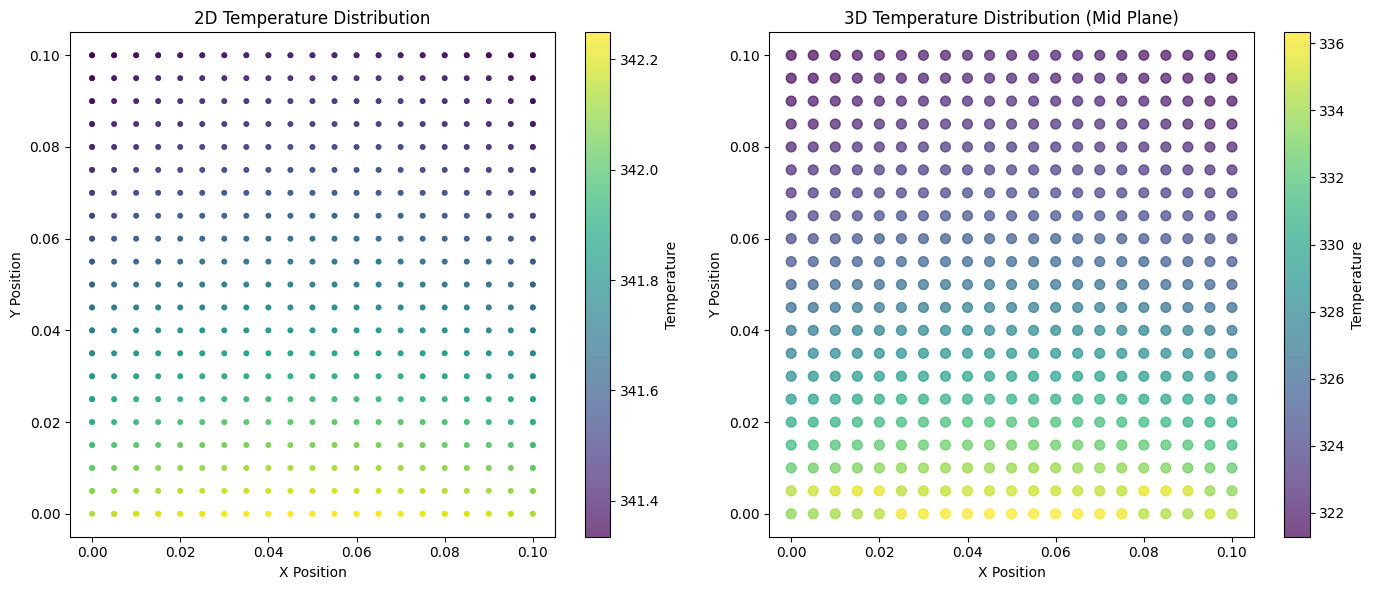

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))

sc1 = ax1.scatter(
    df_2d['X'],
    df_2d['Y'],
    c = df_2d['Temperature'],
    cmap = 'viridis',
    alpha = 0.7,
    s = 10,
    vmin = df_2d['Temperature'].min(),
    vmax = df_2d['Temperature'].max()
)
ax1.set_title('2D Temperature Distribution')
ax1.set_xlabel('X Position')
ax1.set_ylabel('Y Position')

cbar1 = plt.colorbar(sc1, ax = ax1)
cbar1.set_label('Temperature')

sc2 = ax2.scatter(
    df_3d['X'],
    df_3d['Y'],
    c = df_3d['Temperature'],
    cmap = 'viridis',
    alpha = 0.7,
    s = 50,
    vmin = df_3d['Temperature'].min(),
    vmax = df_3d['Temperature'].max()
)
ax2.set_title('3D Temperature Distribution (Mid Plane)')
ax2.set_xlabel('X Position')
ax2.set_ylabel('Y Position')

cbar2 = plt.colorbar(sc2, ax = ax2)
cbar2.set_label('Temperature')

plt.tight_layout()
plt.show()

In [36]:
def prepare_grid(df, round_decimals = 7):
    df['X'] = df['X'].round(round_decimals)
    df['Y'] = df['Y'].round(round_decimals)
    
    # Average temperature for duplicate (X, Y)
    df = df.groupby(['X', 'Y'], as_index = False).mean()

    x_unique = np.sort(df['X'].unique())
    y_unique = np.sort(df['Y'].unique())
    X, Y = np.meshgrid(x_unique, y_unique)

    pivot = df.pivot(index = 'Y', columns = 'X', values = 'Temperature')
    Z = pivot.values

    return X, Y, Z

In [37]:
# Prepare grids
X2d, Y2d, Z2d = prepare_grid(df_2d)
X3d, Y3d, Z3d = prepare_grid(df_3d)

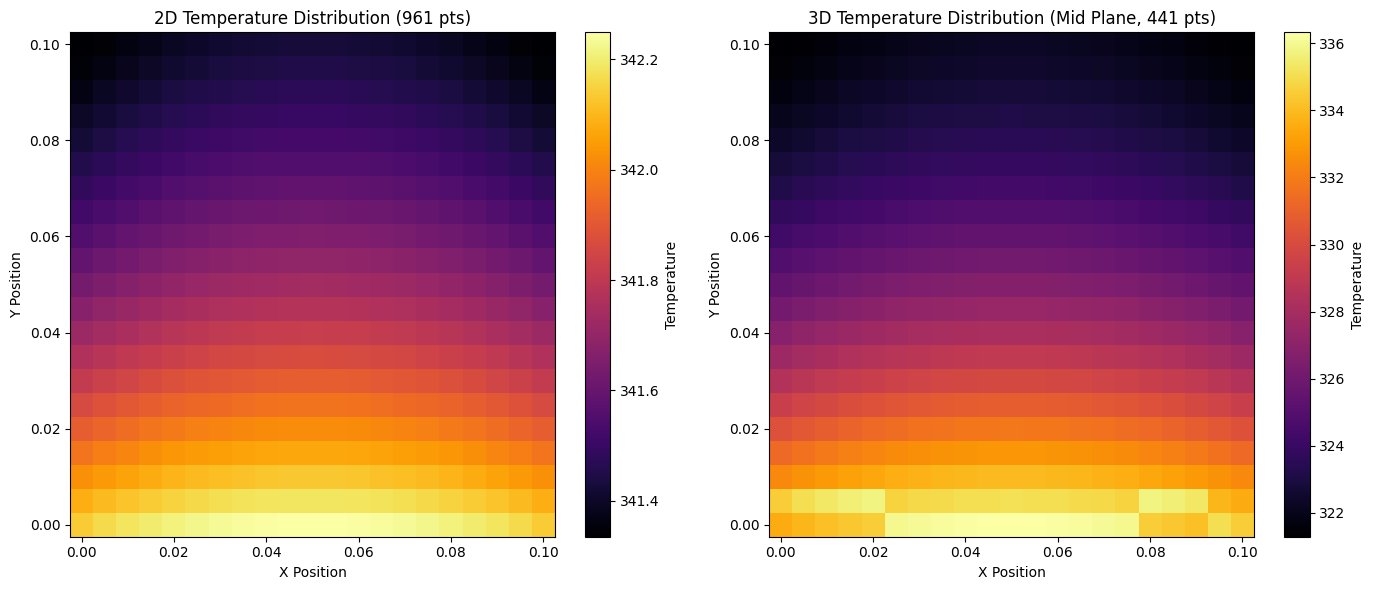

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))

# 2D heatmap
c1 = ax1.pcolormesh(X2d, Y2d, Z2d, cmap = 'inferno', shading = 'auto')
ax1.set_title('2D Temperature Distribution (961 pts)')
ax1.set_xlabel('X Position')
ax1.set_ylabel('Y Position')
fig.colorbar(c1, ax = ax1, label = 'Temperature')

# 3D mid-plane heatmap
c2 = ax2.pcolormesh(X3d, Y3d, Z3d, cmap = 'inferno', shading = 'auto')
ax2.set_title('3D Temperature Distribution (Mid Plane, 441 pts)')
ax2.set_xlabel('X Position')
ax2.set_ylabel('Y Position')
fig.colorbar(c2, ax = ax2, label = 'Temperature')

plt.tight_layout()
plt.show()

In [39]:
def prepare_grid(df, round_decimals = 7):
    df['X'] = df['X'].round(round_decimals)
    df['Y'] = df['Y'].round(round_decimals)
    df = df.groupby(['X', 'Y'], as_index = False).mean()
    x_unique = np.sort(df['X'].unique())
    y_unique = np.sort(df['Y'].unique())
    X, Y = np.meshgrid(x_unique, y_unique)
    pivot = df.pivot(index = 'Y', columns = 'X', values = 'Temperature')
    Z = pivot.values
    return X, Y, Z

In [40]:
base_dir_2d = r"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\Cube\2d"
base_dir_3d = r"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\Cube\3d"

In [41]:
# Load 2D reference (z = 0 plane)
df_2d = pd.read_csv(os.path.join(base_dir_2d, "temp.csv"), header = None, skiprows = 1)
df_2d.columns = ['X', 'Y', 'Temperature']
X2d, Y2d, Z2d = prepare_grid(df_2d)

# Plotting and comparing each 3D layer with 2D
z_planes = ['0', '10', '20', '30', '40', 'Mid']

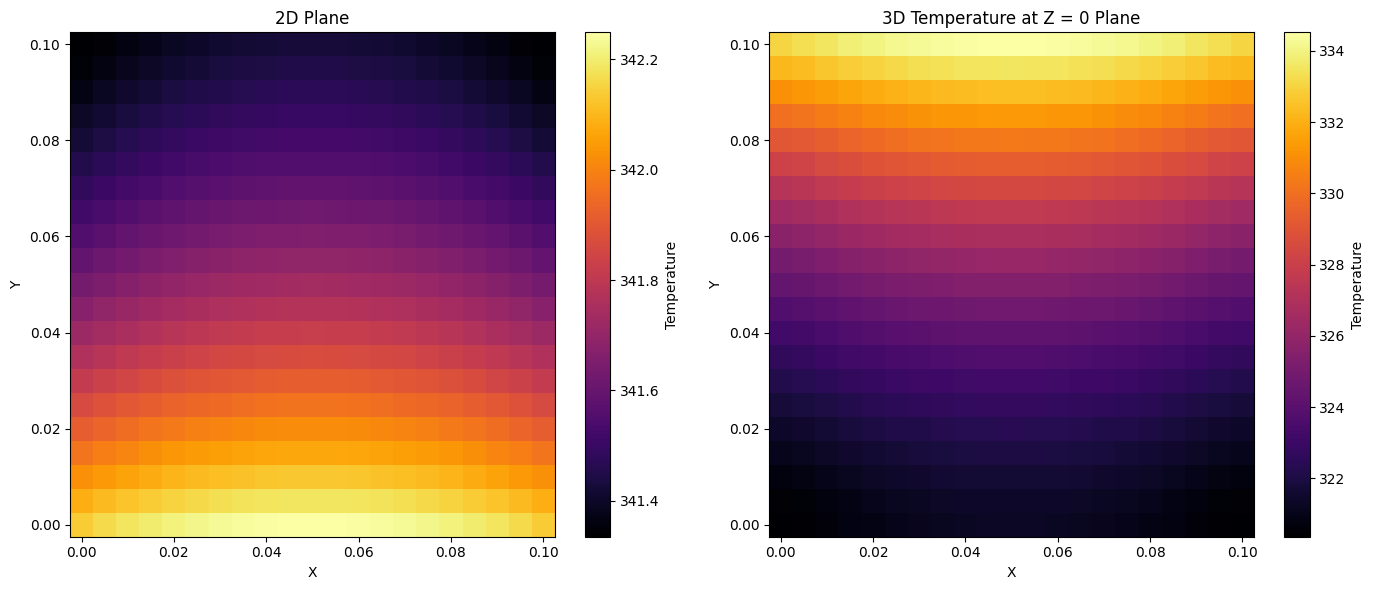

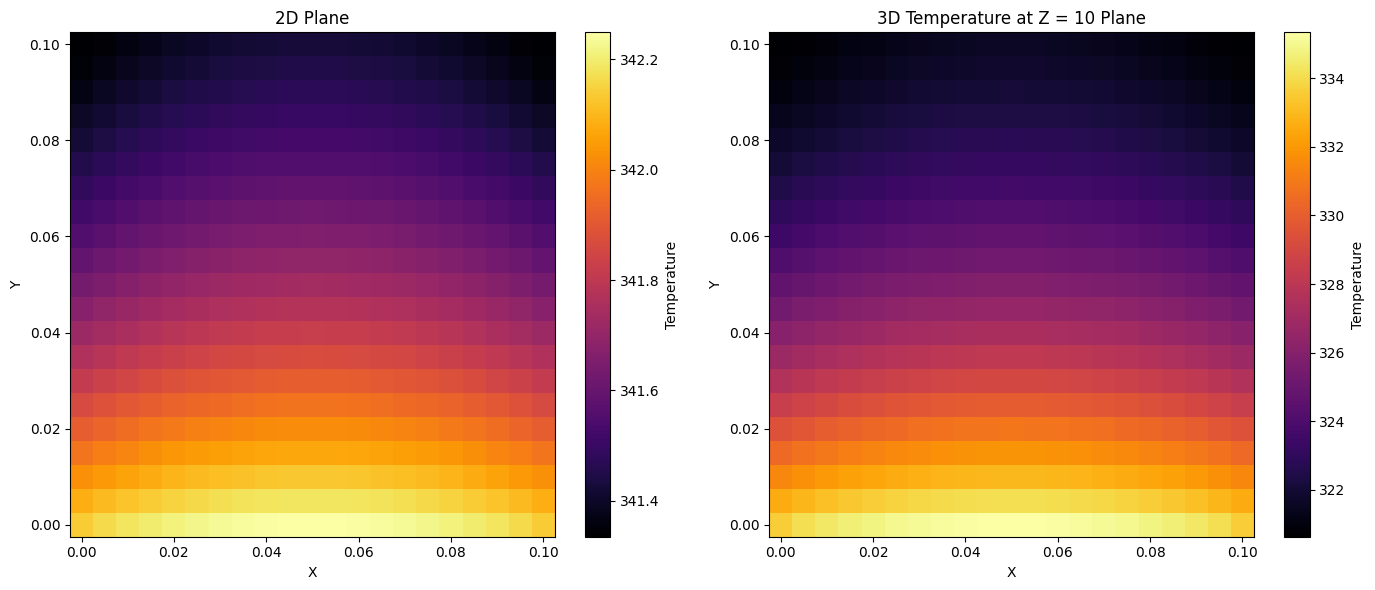

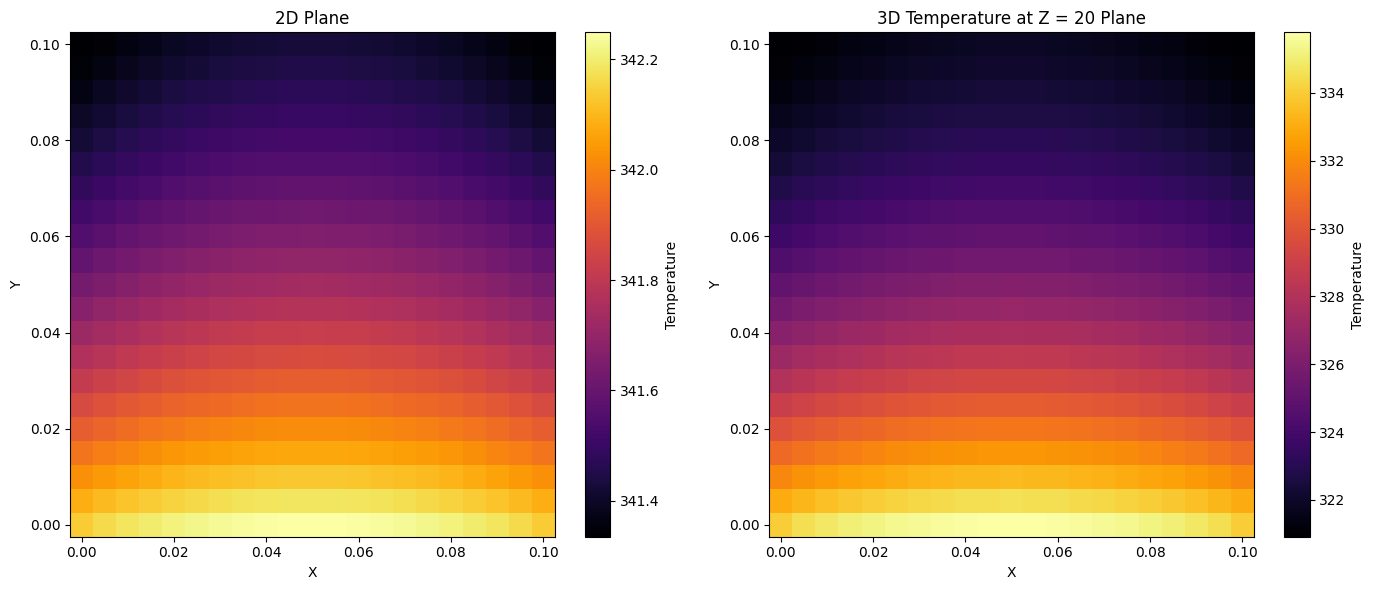

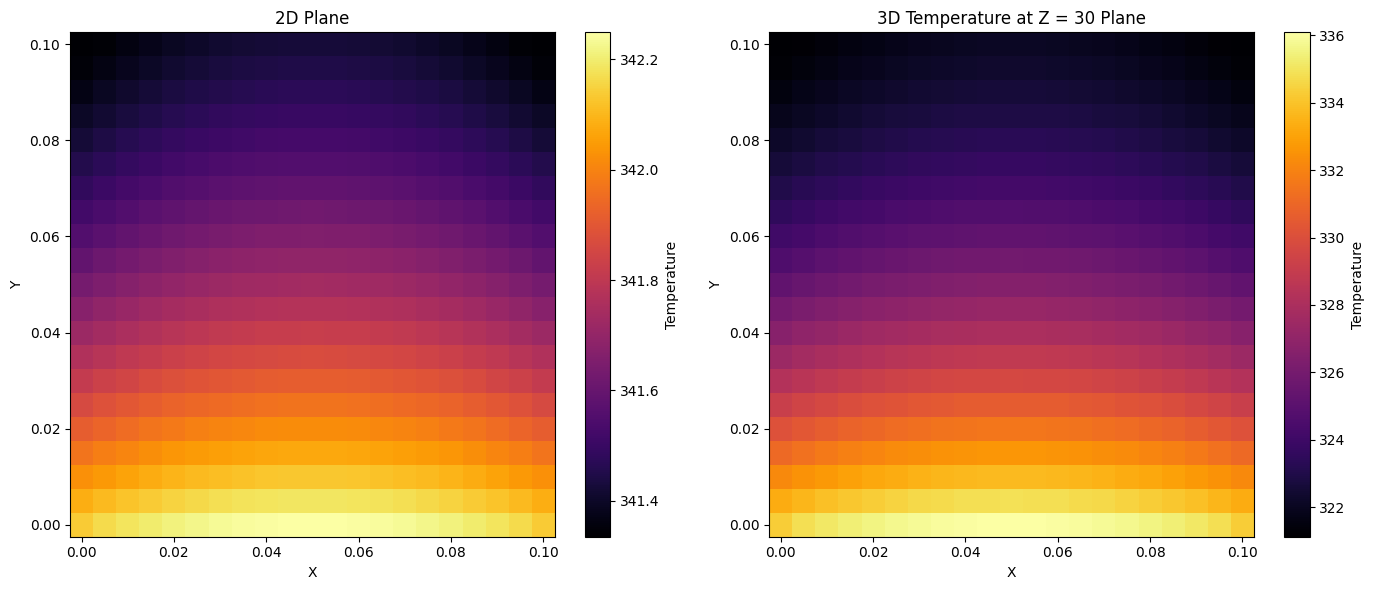

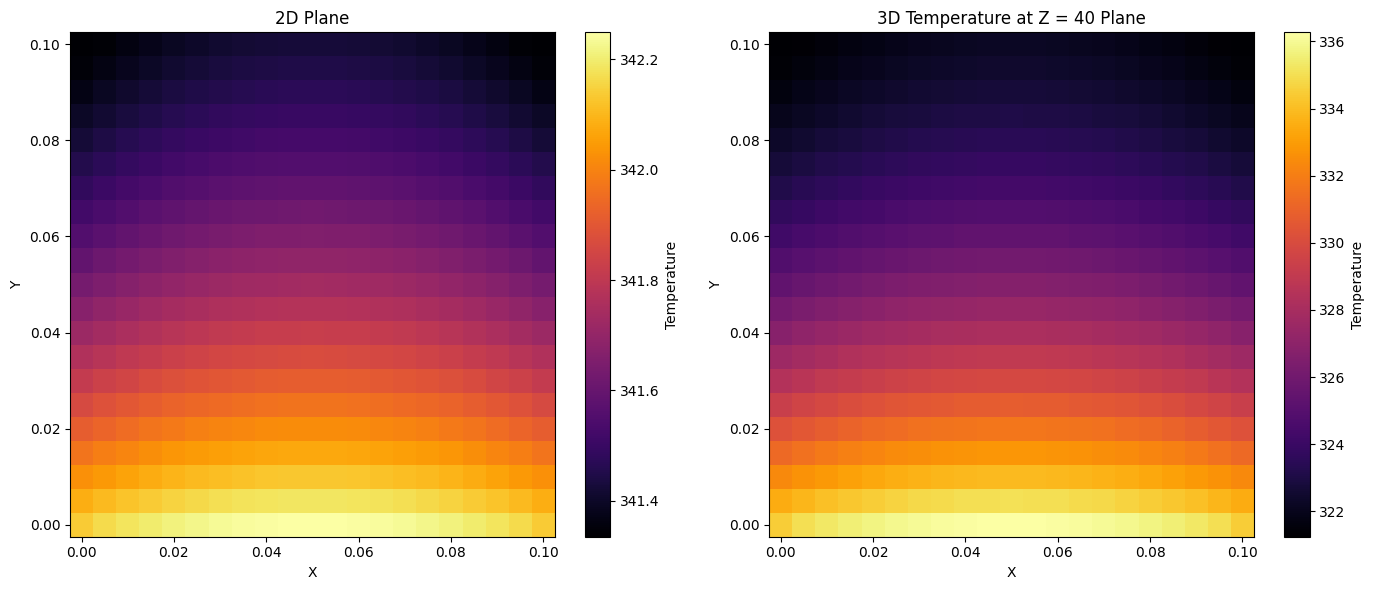

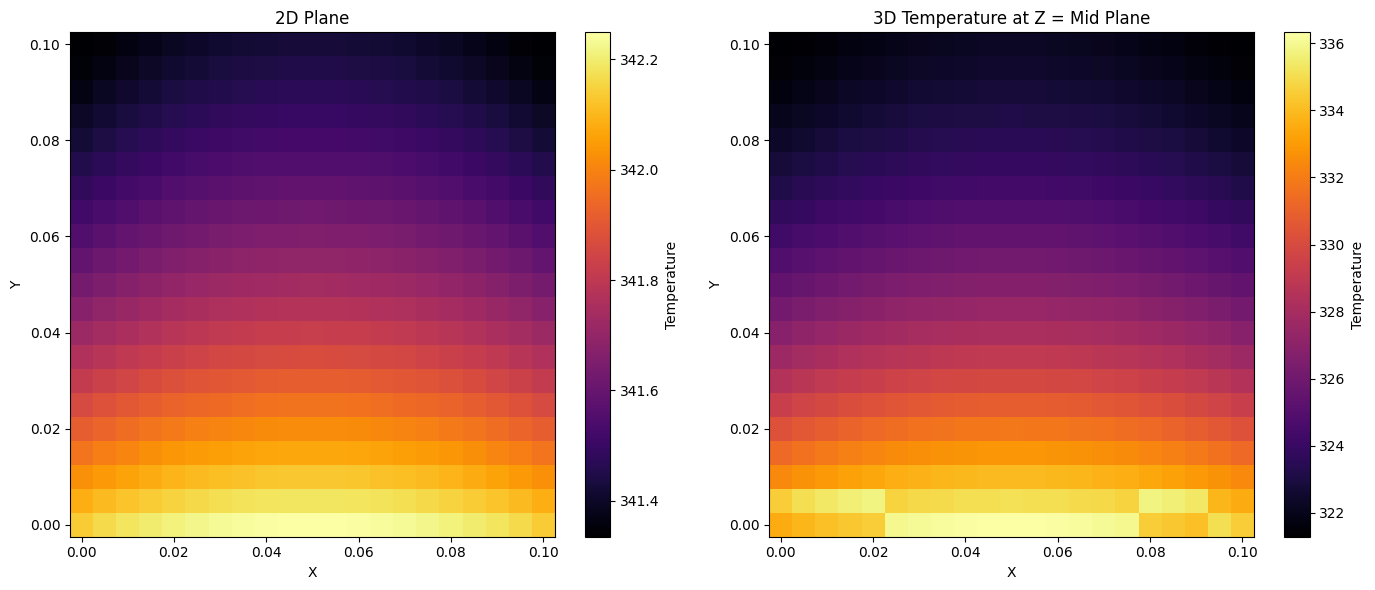

In [42]:
for z in z_planes:
    file_path = os.path.join(base_dir_3d, z, "temp.csv")
    if os.path.exists(file_path):
        df_3d = pd.read_csv(file_path, header = None, skiprows = 1)
        df_3d.columns = ['X', 'Y', 'Temperature']
        X3d, Y3d, Z3d = prepare_grid(df_3d)

        # Plot comparison
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))

        c1 = ax1.pcolormesh(X2d, Y2d, Z2d, cmap = 'inferno', shading = 'auto')
        ax1.set_title(f'2D Plane')
        ax1.set_xlabel('X'); ax1.set_ylabel('Y')
        fig.colorbar(c1, ax = ax1, label = 'Temperature')

        c2 = ax2.pcolormesh(X3d, Y3d, Z3d, cmap = 'inferno', shading = 'auto')
        ax2.set_title(f'3D Temperature at Z = {z} Plane')
        ax2.set_xlabel('X'); ax2.set_ylabel('Y')
        fig.colorbar(c2, ax = ax2, label = 'Temperature')
        
        plt.tight_layout()
        plt.show()
    else:
        print(f"File not found for Z = {z}")

In [43]:
def save_heatmap_csv(X, Y, Z, save_path):
    df_save = pd.DataFrame({
        'X': X.flatten(),
        'Y': Y.flatten(),
        'Temperature': Z.flatten()
    })
    
    df_save.to_csv(save_path, index = False)

# Save 2D temperature heatmap
save_path_2d = r"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\Cube\2d\2D_Temperature_Heatmap.csv"
save_heatmap_csv(X2d, Y2d, Z2d, save_path_2d)

# Save 3D temperature heatmap at Z = 10
z_level = 40
save_path_3d = fr"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\Cube\3d\{z_level}\3D_Temperature_Heatmap.csv"
save_heatmap_csv(X3d, Y3d, Z3d, save_path_3d)

In [44]:
from scipy.interpolate import griddata

In [45]:
base_dir_2d = r"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\Cube\2d"
base_dir_3d = r"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\Cube\3d"
output_dir = os.path.join("S:\\Nit Durgapur\\College 4th Sem\\JU Internship\\Fins Heat Prediction\\Cube", "2D Z Plane")

In [46]:
df_2d = pd.read_csv(os.path.join(base_dir_2d, "temp.csv"), header = None, skiprows = 1)
df_2d.columns = ['X', 'Y', 'Temperature']
df_2d_unique = df_2d.groupby(['X', 'Y']).mean().reset_index() # For unique (X, Y) points

z_planes = ['0', '10', '20', '30', '40', 'Mid']

In [47]:
for z in z_planes:
    file_3d = os.path.join(base_dir_3d, z, "temp.csv") # Connect to the 3D data file
    
    if os.path.exists(file_3d):
        df_3d = pd.read_csv(file_3d, header = None, skiprows = 1)
        df_3d.columns = ['X', 'Y', 'Temperature']
        
        # Interpolate 2D data to 3D (X,Y) coordinates
        interpolated_temps = griddata(
            points = df_2d_unique[['X', 'Y']].values,
            values = df_2d_unique['Temperature'].values,
            xi = df_3d[['X', 'Y']].values,
            method = 'cubic',
            fill_value = np.nan
        )
        
        df_interpolated = pd.DataFrame({
            'X': df_3d['X'],
            'Y': df_3d['Y'],
            'Temperature': interpolated_temps
        }).dropna() # Remove points outside 2D domain
        
        output_file = os.path.join(output_dir, f"2D_Z_{z}.csv")
        df_interpolated.to_csv(output_file, index = False)
        print(f"\nSuccessfully processed and saved Z = {z} plane to: {output_file}")
    
    else:
        print(f"Warning: 3D data not found for Z = {z} at: {file_3d}")

print("\nAll Z-plane interpolation completed!")


Successfully processed and saved Z = 0 plane to: S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\Cube\2D Z Plane\2D_Z_0.csv

Successfully processed and saved Z = 10 plane to: S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\Cube\2D Z Plane\2D_Z_10.csv

Successfully processed and saved Z = 20 plane to: S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\Cube\2D Z Plane\2D_Z_20.csv

Successfully processed and saved Z = 30 plane to: S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\Cube\2D Z Plane\2D_Z_30.csv

Successfully processed and saved Z = 40 plane to: S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\Cube\2D Z Plane\2D_Z_40.csv

Successfully processed and saved Z = Mid plane to: S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\Cube\2D Z Plane\2D_Z_Mid.csv

All Z-plane interpolation completed!


## Calculate temperature difference between 2d and 3d planes

In [48]:
base_dir_3d = r"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\Cube\3d"
interpolated_2d_dir = r"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\Cube\2D Z Plane"
output_dir = r"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\Cube\Temperature_Differences"

In [49]:
z_planes = ['10', '20', '30', '40', 'Mid']

In [50]:
os.makedirs(output_dir, exist_ok = True)

for z in z_planes:
    # File paths
    file_3d = os.path.join(base_dir_3d, z, "temp.csv")
    file_2d_interpolated = os.path.join(interpolated_2d_dir, f"2D_Z_{z}.csv")
    
    if os.path.exists(file_3d) and os.path.exists(file_2d_interpolated):
        # Load 3D data
        df_3d = pd.read_csv(file_3d, header = None, skiprows = 1)
        df_3d.columns = ['X', 'Y', 'Temperature']
        
        # Load interpolated 2D data
        df_2d_interp = pd.read_csv(file_2d_interpolated)
        
        # Merge datasets on X, Y coordinates
        df_merged = pd.merge(df_3d, df_2d_interp, on = ['X', 'Y'], suffixes = ('_3D', '_2D'))
        
        # Calculate temperature difference (3D - 2D)
        df_merged['Temp_Difference'] = df_merged['Temperature_3D'] - df_merged['Temperature_2D']
        
        # Save difference data
        output_file = os.path.join(output_dir, f"Temp_Diff_Z_{z}.csv")
        df_difference = df_merged[['X', 'Y', 'Temperature_3D', 'Temperature_2D', 'Temp_Difference']].copy()
        df_difference.to_csv(output_file, index = False)
        
        print(f"Z = {z}: Mean difference = {df_merged['Temp_Difference'].mean():.4f}")
    
print("Temperature differences calculated and saved!")

Z = 10: Mean difference = -15.3608
Z = 20: Mean difference = -15.0031
Z = 30: Mean difference = -14.7492
Z = 40: Mean difference = -14.5974
Z = Mid: Mean difference = -14.5469
Temperature differences calculated and saved!


### Merging all the temperature difference files to a single excel file

In [51]:
output_dir = r"S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\Cube\Temperature_Differences"
z_planes = ['10', '20', '30', '40', 'Mid']

In [53]:
all_data = []

# Read each file and add Z_Plane column
for z in z_planes:
    file_path = os.path.join(output_dir, f"Temp_Diff_Z_{z}.csv")
    
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        df['Z_Plane'] = z
        all_data.append(df)
        print(f"Loaded Z = {z}: {len(df)} points")
    else:
        print(f"File not found: {file_path}")

# Combine all dataframes
if all_data:
    combined_df = pd.concat(all_data, ignore_index=True)
    
    # Reorder columns to put Z_Plane first
    columns_order = ['X', 'Y', 'Z_Plane', 'Temperature_3D', 'Temperature_2D', 'Temp_Difference']
    combined_df = combined_df[columns_order]
    
    # Save to Excel file
    excel_file = os.path.join(output_dir, "All_Temperature_Differences.csv")
    combined_df.to_csv(excel_file, index = False)
    
    print(f"\nCombined data saved to: {excel_file}")
    print(f"Total data points: {len(combined_df)}")
    print(f"Data shape: {combined_df.shape}")
    
    # Show summary by Z_Plane
    print("\nSummary by Z_Plane:")
    summary = combined_df.groupby('Z_Plane').agg({
        'Temp_Difference': ['count', 'mean', 'std', 'min', 'max']
    }).round(4)
    print(summary)

Loaded Z = 10: 441 points
Loaded Z = 20: 441 points
Loaded Z = 30: 441 points
Loaded Z = 40: 441 points
Loaded Z = Mid: 441 points

Combined data saved to: S:\Nit Durgapur\College 4th Sem\JU Internship\Fins Heat Prediction\Cube\Temperature_Differences\All_Temperature_Differences.csv
Total data points: 2205
Data shape: (2205, 6)

Summary by Z_Plane:
        Temp_Difference                                
                  count     mean     std     min    max
Z_Plane                                                
10                  441 -15.3608  3.9242 -20.705 -6.907
20                  441 -15.0031  3.9710 -20.419 -6.466
30                  441 -14.7492  4.0016 -20.214 -6.160
40                  441 -14.5974  4.0189 -20.091 -5.979
Mid                 441 -14.5469  4.0249 -20.050 -5.919
